In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

import tensorflow as tf

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
os.listdir('/content/drive/MyDrive/KLTN 2025')


['1. BUSINESS CASE.ipynb',
 'BANK_DATASET.csv',
 'bank_clean (1).csv',
 'RATE OF PROCESS.gsheet',
 'DEMO.gdoc',
 'Đặng Vân Anh_Phiếu giao đề tài PTDLKD.docx',
 'FRAMEWORK.gdoc',
 '2.Data cleansing.ipynb',
 '3. Exploratory data analysis.ipynb',
 '4.ML Model.ipynb']

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path
file_path = '/content/drive/MyDrive/KLTN 2025/bank_clean (1).csv'

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/KLTN 2025/bank_clean (1).csv')
df
# # Display the first few rows
# df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2024,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
1,2024,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no
2,2024,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no
3,2024,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no
4,2024,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,2022,43,services,married,secondary,no,6346,yes,no,cellular,11,may,0.95,1,-1,0,unknown,no
33299,2022,44,blue-collar,married,secondary,no,130,yes,yes,cellular,11,may,8.80,1,-1,0,unknown,no
33300,2022,36,technician,married,secondary,no,483,yes,no,cellular,11,may,2.98,1,304,2,failure,no
33301,2022,50,admin.,married,secondary,no,284,yes,no,cellular,11,may,1.77,1,278,3,failure,no


#LOGISTIC REGRESSION

In [5]:
df = df.drop('year', axis=1)


In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,43,services,married,secondary,no,6346,yes,no,cellular,11,may,0.95,1,-1,0,unknown,no
33299,44,blue-collar,married,secondary,no,130,yes,yes,cellular,11,may,8.80,1,-1,0,unknown,no
33300,36,technician,married,secondary,no,483,yes,no,cellular,11,may,2.98,1,304,2,failure,no
33301,50,admin.,married,secondary,no,284,yes,no,cellular,11,may,1.77,1,278,3,failure,no


In [7]:

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Converting selected columns into dummies using the pandas 'get_dummies' function. The function encodes a 1 if the value is present and if not it assigns a 0.

In [8]:
new_data = pd.get_dummies(df[['job', 'marital','education','default','housing','loan','contact','month','poutcome']], drop_first=True)
new_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
33299,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
33300,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
33301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
new_data = new_data.astype(int)
new_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
33299,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
33300,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
33301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:

y_data = df['y']
age_data = df['age']
duration_data = df['duration']
campaign_data = df['campaign']
clean_data = pd.concat([y_data,age_data,duration_data,campaign_data, new_data], axis=1)

In [11]:

clean_data['y']  = clean_data['y'].replace('yes',1)
clean_data['y']  = clean_data['y'].replace('no',0)

<ipython-input-11-afeb7f9490ec>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['y']  = clean_data['y'].replace('no',0)


In [12]:

clean_data

,y,age,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,4.35,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,44,2.52,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,33,1.27,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,47,1.53,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,33,3.30,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,0,43,0.95,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
33299,0,44,8.80,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
33300,0,36,2.98,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33301,0,50,1.77,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# df1: Các cột về marital
df1 = clean_data[['marital_single', 'marital_married', 'y']].copy()

# df2: Các cột về job
df2 = clean_data[['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
                  'job_management', 'job_retired', 'job_self-employed',
                  'job_services', 'job_student', 'job_technician',
                  'job_unemployed', 'job_unknown', 'y']].copy()

# df3: Các cột về education (theo clean_data thì bạn đang dùng: secondary, tertiary, unknown)
df3 = clean_data[['education_secondary', 'education_tertiary',
                  'education_unknown', 'y']].copy()

# df4: Các cột về tháng (tháng 9 - sep không có trong clean_data nên sẽ bỏ)
df4 = clean_data[['month_aug', 'month_dec', 'month_feb', 'month_jan',
                  'month_jul', 'month_jun', 'month_mar',
                  'month_may', 'month_nov', 'month_oct', 'y']].copy()

# df5: Bạn chưa có cột day_of_week_* trong clean_data — bạn cần one-hot encode nếu muốn tạo ra df5
# Tạm thời sẽ comment dòng này lại để tránh lỗi
# df5 = clean_data[['day_of_week_mon', 'day_of_week_thu','day_of_week_tue','day_of_week_wed','y']].copy()

# df6: Cột duration, age và y
df6 = clean_data[['duration', 'age', 'y']].copy()


In [14]:
print(clean_data.columns)


Index(['y', 'age', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


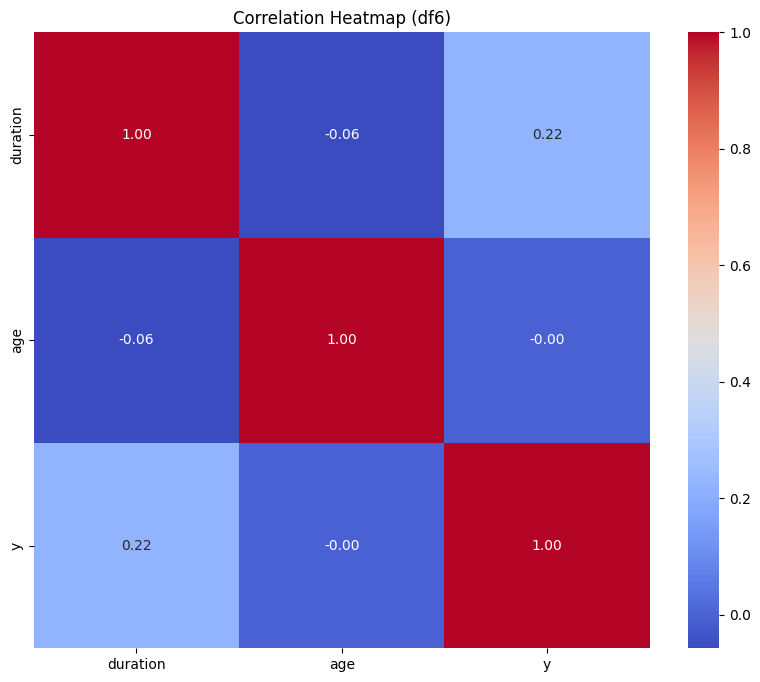

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df6.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (df6)")
plt.show()



<Axes: >

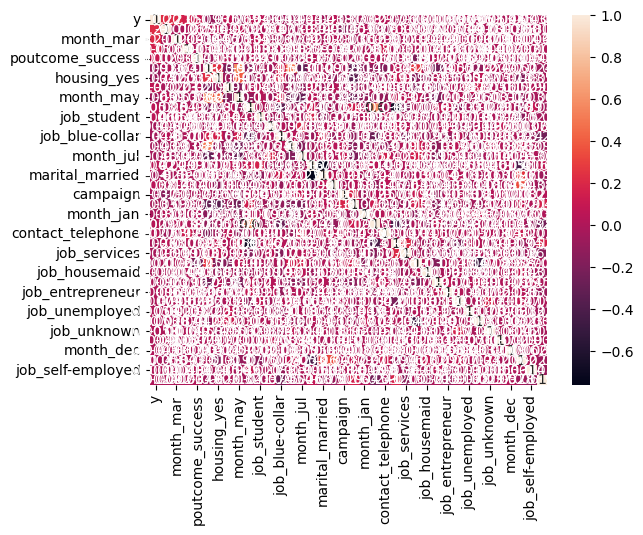

In [16]:
corr = clean_data.corr()
sorted_cols = corr['y'].abs().sort_values(ascending=False).index
sorted_corr = corr.loc[sorted_cols, sorted_cols]
sns.heatmap(sorted_corr, annot=True)


In [17]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
chi_results = []

for col in categorical_cols:
    table = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = chi2_contingency(table)
    v = cramers_v(table)

    chi_results.append({
        "Biến": col,
        "Kiểm định": "Chi-squared",
        "p-value": round(p, 4),
        "Cramér’s V": round(v, 4),
        "Có ý nghĩa": "Yes" if p < 0.05 else "No"
    })

chi_df = pd.DataFrame(chi_results)
print("Chi-squared test kết quả:")
print(chi_df)

Chi-squared test kết quả:
        Biến    Kiểm định  p-value  Cramér’s V Có ý nghĩa
0        job  Chi-squared   0.0000      0.0810        Yes
1    marital  Chi-squared   0.0000      0.0443        Yes
2  education  Chi-squared   0.0000      0.0545        Yes
3    default  Chi-squared   0.4642      0.0040         No
4    housing  Chi-squared   0.0000      0.0746        Yes
5       loan  Chi-squared   0.0000      0.0438        Yes
6    contact  Chi-squared   0.0000      0.0935        Yes
7      month  Chi-squared   0.0000      0.3146        Yes
8   poutcome  Chi-squared   0.0000      0.1018        Yes


In [18]:
from scipy.stats import ttest_ind, pointbiserialr

numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
ttest_results = []

for col in numeric_cols:
    group_yes = df[df['y'] == 'yes'][col]
    group_no = df[df['y'] == 'no'][col]

    # T-test
    t_stat, p = ttest_ind(group_yes, group_no, equal_var=False)

    # Point-Biserial correlation
    # Ensure 'y_binary' exists or create it
    if 'y_binary' not in df.columns:
        df['y_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

    corr, _ = pointbiserialr(df['y_binary'], df[col])

    ttest_results.append({
        "Biến": col,
        "Kiểm định": "T-test + PointBiserial",
        "p-value": round(p, 4),
        "Hệ số tương quan": round(abs(corr), 4),
        "Có ý nghĩa": "Yes" if p < 0.05 else "No"
    })

ttest_df = pd.DataFrame(ttest_results)
print("T-test và tương quan nhị phân:")
print(ttest_df)

T-test và tương quan nhị phân:
       Biến               Kiểm định  p-value  Hệ số tương quan Có ý nghĩa
0       age  T-test + PointBiserial   0.5488            0.0043         No
1   balance  T-test + PointBiserial   0.0000            0.0328        Yes
2  duration  T-test + PointBiserial   0.0000            0.2196        Yes
3  campaign  T-test + PointBiserial   0.0000            0.0369        Yes
4     pdays  T-test + PointBiserial   0.6929            0.0020         No
5  previous  T-test + PointBiserial   0.1581            0.0051         No


# Model 1 (With RFE Selection Algorithm)

```
# This is formatted as code
```



In [19]:

y = clean_data['y']
x = clean_data.drop('y',axis=1)

In [20]:
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [21]:
columns = x_train.columns
columns

Index(['age', 'duration', 'campaign', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [22]:

os_data_X,os_data_y=os.fit_resample(x_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [23]:

clean_data_vars=clean_data.columns.values.tolist()
y=['y']
X=[i for i in clean_data if i not in y]


Using RFE or Recursive Feature Elimination to eliminate the unimportant variables. RFE recursively iterates through the data and gives the best possible combination of columns to undergo logistic regression

In [24]:

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True False  True  True False False False
 False]
[33 26 32 12  5  7 16 17  8  4 14 15  6 13 24 25 20 21  9 28 22 11 19 18
  2 29 10  1  1  1 31  1  1 23  3 27 30]


In [25]:


# Hiển thị các đặc trưng được chọn
selected_features = x_train.columns[rfe.support_]
print("Các đặc trưng được chọn:", selected_features)

Các đặc trưng được chọn: Index(['month_jan', 'month_jul', 'month_jun', 'month_may', 'month_nov'], dtype='object')


In [26]:

x.columns

Index(['age', 'duration', 'campaign', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [27]:
print(os_data_y.columns)
y = os_data_y['y']  # nếu 'y' là tên cột nhãn


Index(['y'], dtype='object')


In [28]:
cols = [
    'duration',
    'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_self-employed', 'job_unemployed',
    'education_secondary', 'education_tertiary', 'education_unknown',
    'contact_telephone',
    'month_aug', 'month_jul', 'month_jun', 'month_may', 'month_nov',
    'poutcome_success', 'poutcome_other', 'poutcome_unknown'
]

X = os_data_X[cols]
y = os_data_y['y']


In [29]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.245363
         Iterations 8
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  y                 Pseudo R-squared:  0.646     
Date:                2025-06-01 02:56  AIC:               23690.9138
No. Observations:    48204             BIC:               23849.0114
Df Model:            17                Log-Likelihood:    -11827.   
Df Residuals:        48186             LL-Null:           -33412.   
Converged:           1.0000            LLR p-value:       0.0000    
No. Iterations:      8.0000            Scale:             1.0000    
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
duration             0.6929   0.0077  89.6569 0.0000  0.6778  0.7081
job_blue-collar     -2.3368 

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

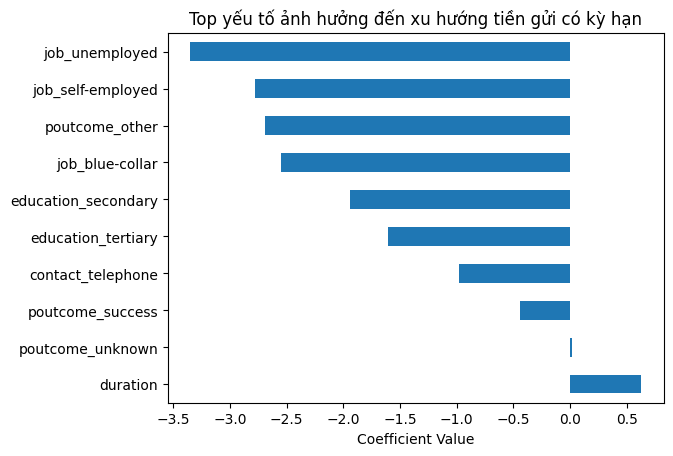

In [31]:
# Get the coefficients of the Logistic Regression model
coefficients = logreg.coef_[0]  # Access the coefficients (assuming binary classification)

# Create a Pandas Series to store feature importances
feat_importances = pd.Series(coefficients, index=X.columns)

# Plot feature importances
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top yếu tố ảnh hưởng đến xu hướng tiền gửi có kỳ hạn")
plt.xlabel("Coefficient Value")  # Update x-axis label
plt.show()

In [32]:

y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [33]:
# print((logreg.score(X_test, y_test)*100))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
# y_pred = logreg.predict(X_test)

# Tính toán các chỉ số
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

logistic_array = np.array([precision, recall, f1])
logistic_array


Precision: 88.8995
Recall: 93.9973
F1-score: 91.3773


array([88.89946083, 93.99731724, 91.37734311])

In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6087
           1       0.89      0.94      0.91      5964

    accuracy                           0.91     12051
   macro avg       0.91      0.91      0.91     12051
weighted avg       0.91      0.91      0.91     12051



In [35]:

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5387,  700],
       [ 358, 5606]])

# Model 2 (With All Columns)

In [36]:

y = clean_data['y']
x = clean_data.drop('y',axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .80)


In [38]:

lreg = LogisticRegression()

In [39]:

lreg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:

pred2 = lreg.predict(x_test)
pred2

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
# print((logreg.score(X_test, y_test)*100))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
# y_pred = logreg.predict(X_test)

# Tính toán các chỉ số
precision = precision_score(y_test, pred2) * 100
recall = recall_score(y_test, pred2) * 100
f1 = f1_score(y_test, pred2)  * 100

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precision: 53.9683
Recall: 15.3846
F1-score: 23.9437


In [42]:

zero_count = np.count_nonzero(pred2 == 0)
zero_count

6598

In [43]:
print(classification_report(y_test, pred2))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6440
           1       0.54      0.15      0.24       221

    accuracy                           0.97      6661
   macro avg       0.76      0.57      0.61      6661
weighted avg       0.96      0.97      0.96      6661



In [44]:

cnf_matrix = metrics.confusion_matrix(y_test,pred2)
cnf_matrix

array([[6411,   29],
       [ 187,   34]])


### Overall, both the models have predicted with a high degree of accuracy, that there is a good chance that 'no' will be selected or that the customers won't be willing to choose the term deposit

#RANDOM FOREST CLASSIFIER


In [45]:

from sklearn.ensemble import RandomForestClassifier

In [46]:
regressor = RandomForestClassifier(n_estimators = 10, random_state = 100)


In [47]:
regressor.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=100)

In [48]:
predicted = regressor.predict(x_test)


In [49]:
# accuracy_score(y_test,predicted)*100
# print((logreg.score(X_test, y_test)*100))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
y_pred = logreg.predict(X_test)

# Tính toán các chỉ số
precision = precision_score(y_test, predicted) * 100
recall = recall_score(y_test, predicted) * 100
f1 = f1_score(y_test, predicted) * 100

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
random_array = np.array([precision, recall, f1])
random_array

Precision: 48.5714
Recall: 15.3846
F1-score: 23.3677


array([48.57142857, 15.38461538, 23.36769759])

In [50]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6440
           1       0.49      0.15      0.23       221

    accuracy                           0.97      6661
   macro avg       0.73      0.57      0.61      6661
weighted avg       0.96      0.97      0.96      6661



# XGBoost

In [51]:
from xgboost import XGBClassifier


In [52]:
clf = XGBClassifier(n_estimators=1000,random_state=100)
clf.fit(x_train, y_train)
predicted=clf.predict(x_test)

In [53]:

# y_predxgb = clf.predict(x_test)
# y_predxgb

In [54]:

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
# y_pred = logreg.predict(X_test)

# Tính toán các chỉ số
precision = precision_score(y_test,predicted) * 100
recall = recall_score(y_test, predicted) * 100
f1 = f1_score(y_test, predicted) * 100

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

xgboost_array = np.array([precision, recall, f1])

xgboost_array

Precision: 37.1622
Recall: 24.8869
F1-score: 29.8103


array([37.16216216, 24.88687783, 29.8102981 ])

In [55]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6440
           1       0.37      0.25      0.30       221

    accuracy                           0.96      6661
   macro avg       0.67      0.62      0.64      6661
weighted avg       0.95      0.96      0.96      6661



#LightGBM


In [56]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [57]:
# 3. Tạo dataset cho LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [58]:
# Dùng API sklearn của LightGBM
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    random_state=42
)

In [59]:

os = SMOTE(random_state=0)
x_resampled, y_resampled = os.fit_resample(x, y)


In [60]:
# 2. Tách tập train/test
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, train_size=0.75, random_state=0)

In [61]:
# 3. Khởi tạo mô hình
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    random_state=42
)

In [62]:
# 4. Huấn luyện mô hình
model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=10)],
)

[LightGBM] [Info] Number of positive: 23955, number of negative: 24253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 48208, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496909 -> initscore=-0.012363
[LightGBM] [Info] Start training from score -0.012363
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0718305


LGBMClassifier(learning_rate=0.05, n_estimators=1000, objective='binary',
               random_state=42)

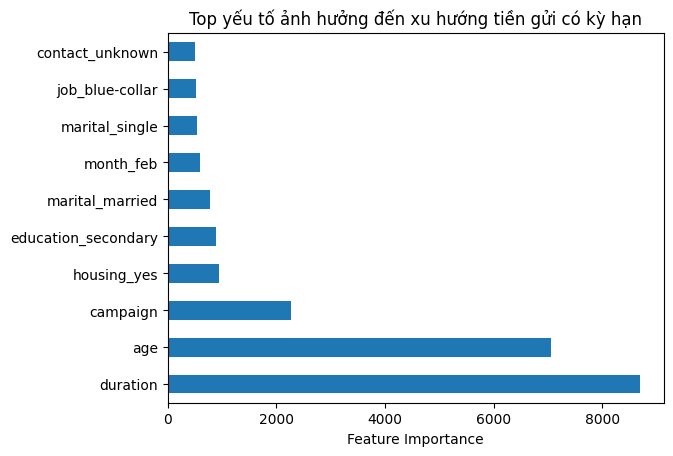

In [63]:
# Get feature importances from the LightGBM model
feature_importances = model.feature_importances_

# Instead of using X.columns (which has 18 columns), use x.columns which has 37 columns
feat_importances = pd.Series(feature_importances, index=x.columns)

# Plot feature importances
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top yếu tố ảnh hưởng đến xu hướng tiền gửi có kỳ hạn")
plt.xlabel("Feature Importance")  # Update x-axis label
plt.show()

In [64]:

# 5. Dự đoán & đánh giá
y_pred1 = model.predict(x_test)


from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
# y_pred2 = logreg.predict(X_test)

# Tính toán các chỉ số
precision = precision_score(y_test,y_pred1) * 100
recall = recall_score(y_test, y_pred1) * 100
f1 = f1_score(y_test, y_pred1) * 100

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

light_array = np.array([precision, recall, f1])
light_array

Precision: 96.9777
Recall: 98.4115
F1-score: 97.6894


array([96.97772426, 98.4115347 , 97.68936867])

In [65]:
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7886
           1       0.97      0.98      0.98      8184

    accuracy                           0.98     16070
   macro avg       0.98      0.98      0.98     16070
weighted avg       0.98      0.98      0.98     16070



#OVERVIEW

In [66]:
logreg_metrics = [0.85, 0.60, 0.70]
rf_metrics = [0.87, 0.65, 0.74]
xgb_metrics = [0.89, 0.68, 0.77]

# Danh sách mô hình
model_names = ["Logistic Regression", "Random Forest", "XGBoost","LightGBM"]
metric_names = ["Precision", "Recall", "F1-score"]

# Gộp tất cả metrics thành 1 mảng 2D
all_metrics = np.array([logistic_array, random_array, xgboost_array,light_array])

# Tạo bảng
metrics_df = pd.DataFrame(data=all_metrics, columns=metric_names, index=model_names)

# In bảng
print(metrics_df)


                     Precision     Recall   F1-score
Logistic Regression  88.899461  93.997317  91.377343
Random Forest        48.571429  15.384615  23.367698
XGBoost              37.162162  24.886878  29.810298
LightGBM             96.977724  98.411535  97.689369
